# ML Course 3 - Practice

## Subject

**`FuelConsumption.csv`** is a vehicle fuel consumption data set that contains model-specific fuel consumption.
-   **MODELYEAR** e.g. 2014
-   **MAKE** e.g. Acura
-   **MODEL** e.g. ILX
-   **VEHICLE CLASS** e.g. SUV
-   **ENGINE SIZE** e.g. 4.7
-   **CYLINDERS** e.g 6
-   **TRANSMISSION** e.g. A6
-   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
-   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
-   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
-   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("FuelConsumption.csv")

In [3]:
df.sample(6)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
180,2014,CADILLAC,ESCALADE AWD,SUV - STANDARD,6.2,8,A6,E,23.3,16.1,20.1,14,322
1022,2014,VOLKSWAGEN,BEETLE CONVERTIBLE,SUBCOMPACT,2.0,4,M6,Z,10.8,7.6,9.4,30,216
79,2014,BMW,328d xDRIVE,COMPACT,2.0,4,A8,D,7.6,5.5,6.7,42,181
653,2014,LAND ROVER,RANGE ROVER V8 5.0 SC FFV,SUV - STANDARD,5.0,8,AS8,Z,17.2,12.5,15.1,19,347
430,2014,FORD,TRANSIT CONNECT TAXI,SPECIAL PURPOSE VEHICLE,1.6,4,AS6,X,11.5,8.3,10.1,28,232
955,2014,SUBARU,LEGACY AWD,MID-SIZE,2.5,4,AV,X,9.7,7.3,8.6,33,198


* Compute the correlation value between the CO2 emission and the engine size. Do you think that the engine size can be taken as a unique predictor for the CO2 emission? 
* Plot the CO2 emission with respect to the engine size. Do you think that a linear regression model would fit well here?
* Train a linear regression model for the prediction of the CO2 emission based exclusively on the engine size (do not forget the train-test split).
* What are the parameters of the regression line? If an engine size is increased by 1 L, what would be the CO2 emission increase as predicted by your model? 
* Plot the fit line over the data.
* Plot the distribution of the residuals (i.e. the error terms).
* Compute the model accuracy.
* Train a linear regression model for the prediction of the CO2 emission now based exclusively on the combined fuel consumption (FUELCONSUMPTION_COMB) and compute the accuracy. Compare with the accuracy computed at previous point. What can you deduce?

In [4]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df = df.drop(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE' ], axis=1)
df.sample(n=5, random_state = 20)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
568,5.0,8,15.6,10.9,13.5,21,310
589,2.0,4,11.1,8.3,9.8,29,225
530,3.7,6,13.3,9.4,11.5,25,265
830,2.0,4,9.9,7.5,8.8,32,202
592,2.4,4,10.3,8.3,9.4,30,216


In [6]:
df.duplicated().sum()

284

In [7]:
correlation = df.corr()
correlation

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


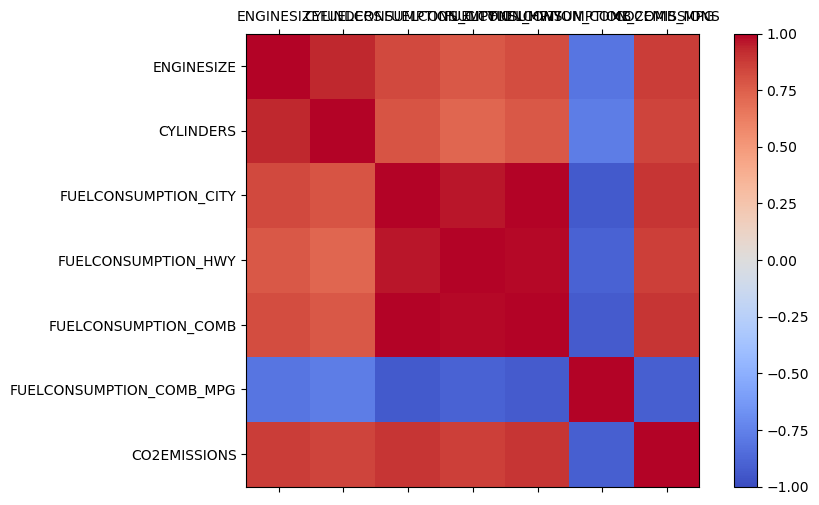

In [8]:
fig = plt.figure(figsize=(9,6), dpi= 100)
ax = fig.add_subplot(1,1,1)
cax = ax.matshow(correlation, cmap = plt.cm.coolwarm, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(correlation))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
names = df.columns
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

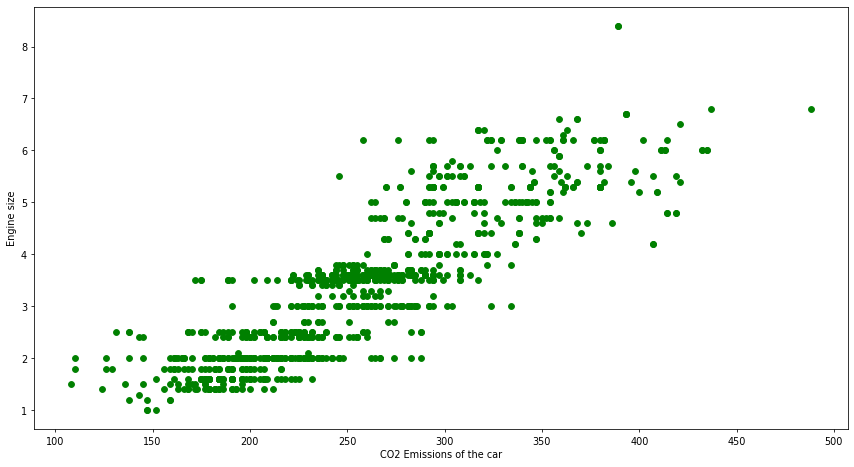

In [9]:
plt.figure(figsize=(15,8), dpi= 70)
plt.scatter(df['CO2EMISSIONS'], df['ENGINESIZE'], c='Green')
plt.xlabel("CO2 Emissions of the car")
plt.ylabel("Engine size")
plt.show()

In [10]:
X = df['CO2EMISSIONS'].values.reshape(-1,1)

In [11]:
y = df['ENGINESIZE'].values.reshape(-1,1)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [14]:
print(regressor.intercept_)

[-1.68556968]


In [15]:
print(regressor.coef_)

[[0.0194758]]


In [16]:
print(regressor.predict([[1]]))

[[-1.66609389]]


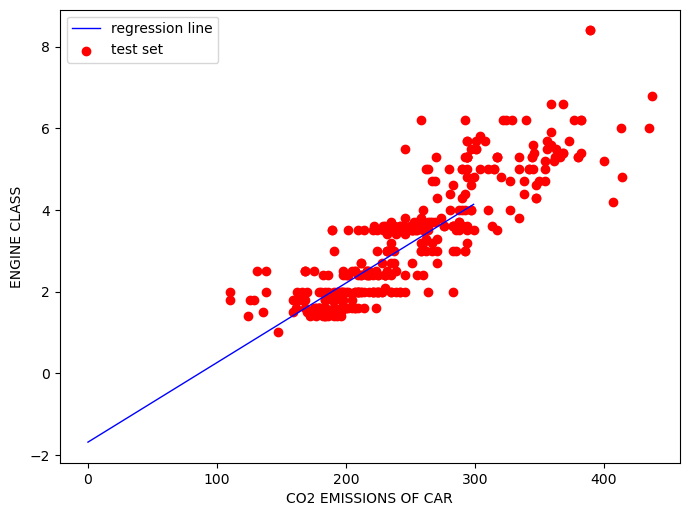

In [17]:
X_plot = np.arange(0,300,1).reshape(-1, 1)
y_plot = regressor.predict(X_plot)
plt.figure(figsize=(8,6), dpi= 100)
plt.scatter(X_test, y_test, c='Red', label='test set')
plt.plot(X_plot, y_plot, c='blue', label='regression line', linewidth=1)
plt.xlabel("CO2 EMISSIONS OF CAR")
plt.ylabel("ENGINE CLASS")
plt.legend()
plt.show()

In [18]:
y_pred = regressor.predict(X_test)
RSS = sum((y_pred - y_test)**2)
MSE = np.mean((y_pred - y_test)**2)
MAE = np.mean(abs(y_pred - y_test))
RMSE = (np.mean((y_pred - y_test)))

In [19]:
print(RSS)
print(MSE)
print(MAE)
print(RMSE)

[192.01778599]
0.5393758033404145
0.5626782153584293
-0.12471404753450722


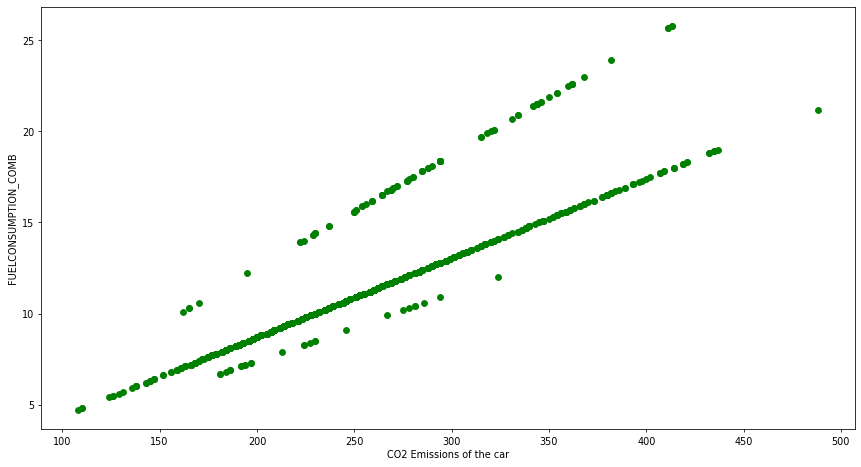

In [20]:
plt.figure(figsize=(15,8), dpi= 70)
plt.scatter(df['CO2EMISSIONS'], df['FUELCONSUMPTION_COMB'], c='Green')
plt.xlabel("CO2 Emissions of the car")
plt.ylabel("FUELCONSUMPTION_COMB")
plt.show()

In [24]:
X = df['CO2EMISSIONS'].values.reshape(-1,1)

In [25]:
y = df['FUELCONSUMPTION_COMB_MPG'].values.reshape(-1,1)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)


In [28]:
print(regressor.intercept_)

[-1.68556968]


In [29]:
print(regressor.coef_)

[[0.0194758]]


In [31]:
y_pred = regressor.predict(X_test)
RSS = sum((y_pred - y_test)**2)
MSE = np.mean((y_pred - y_test)**2)
MAE = np.mean(abs(y_pred - y_test))
RMSE = (np.mean((y_pred - y_test)))

[228259.46663583]
641.1782770669278
23.675556744163718
-23.675556744163718
